In [1]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import os
import csv
import numpy as np
from tensorflow.keras.models import load_model

D1019 08:13:09.455837506      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D1019 08:13:09.455865877      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D1019 08:13:09.455869262      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D1019 08:13:09.455871642      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D1019 08:13:09.455888688      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D1019 08:13:09.455891164      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D1019 08:13:09.455893595      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D1019 08:13:09.

In [2]:
root_dir='../input/taiwanese-food-101/tw_food_101/tw_food_101'
train_dir = root_dir + '/train'
test_dir = root_dir + '/test'

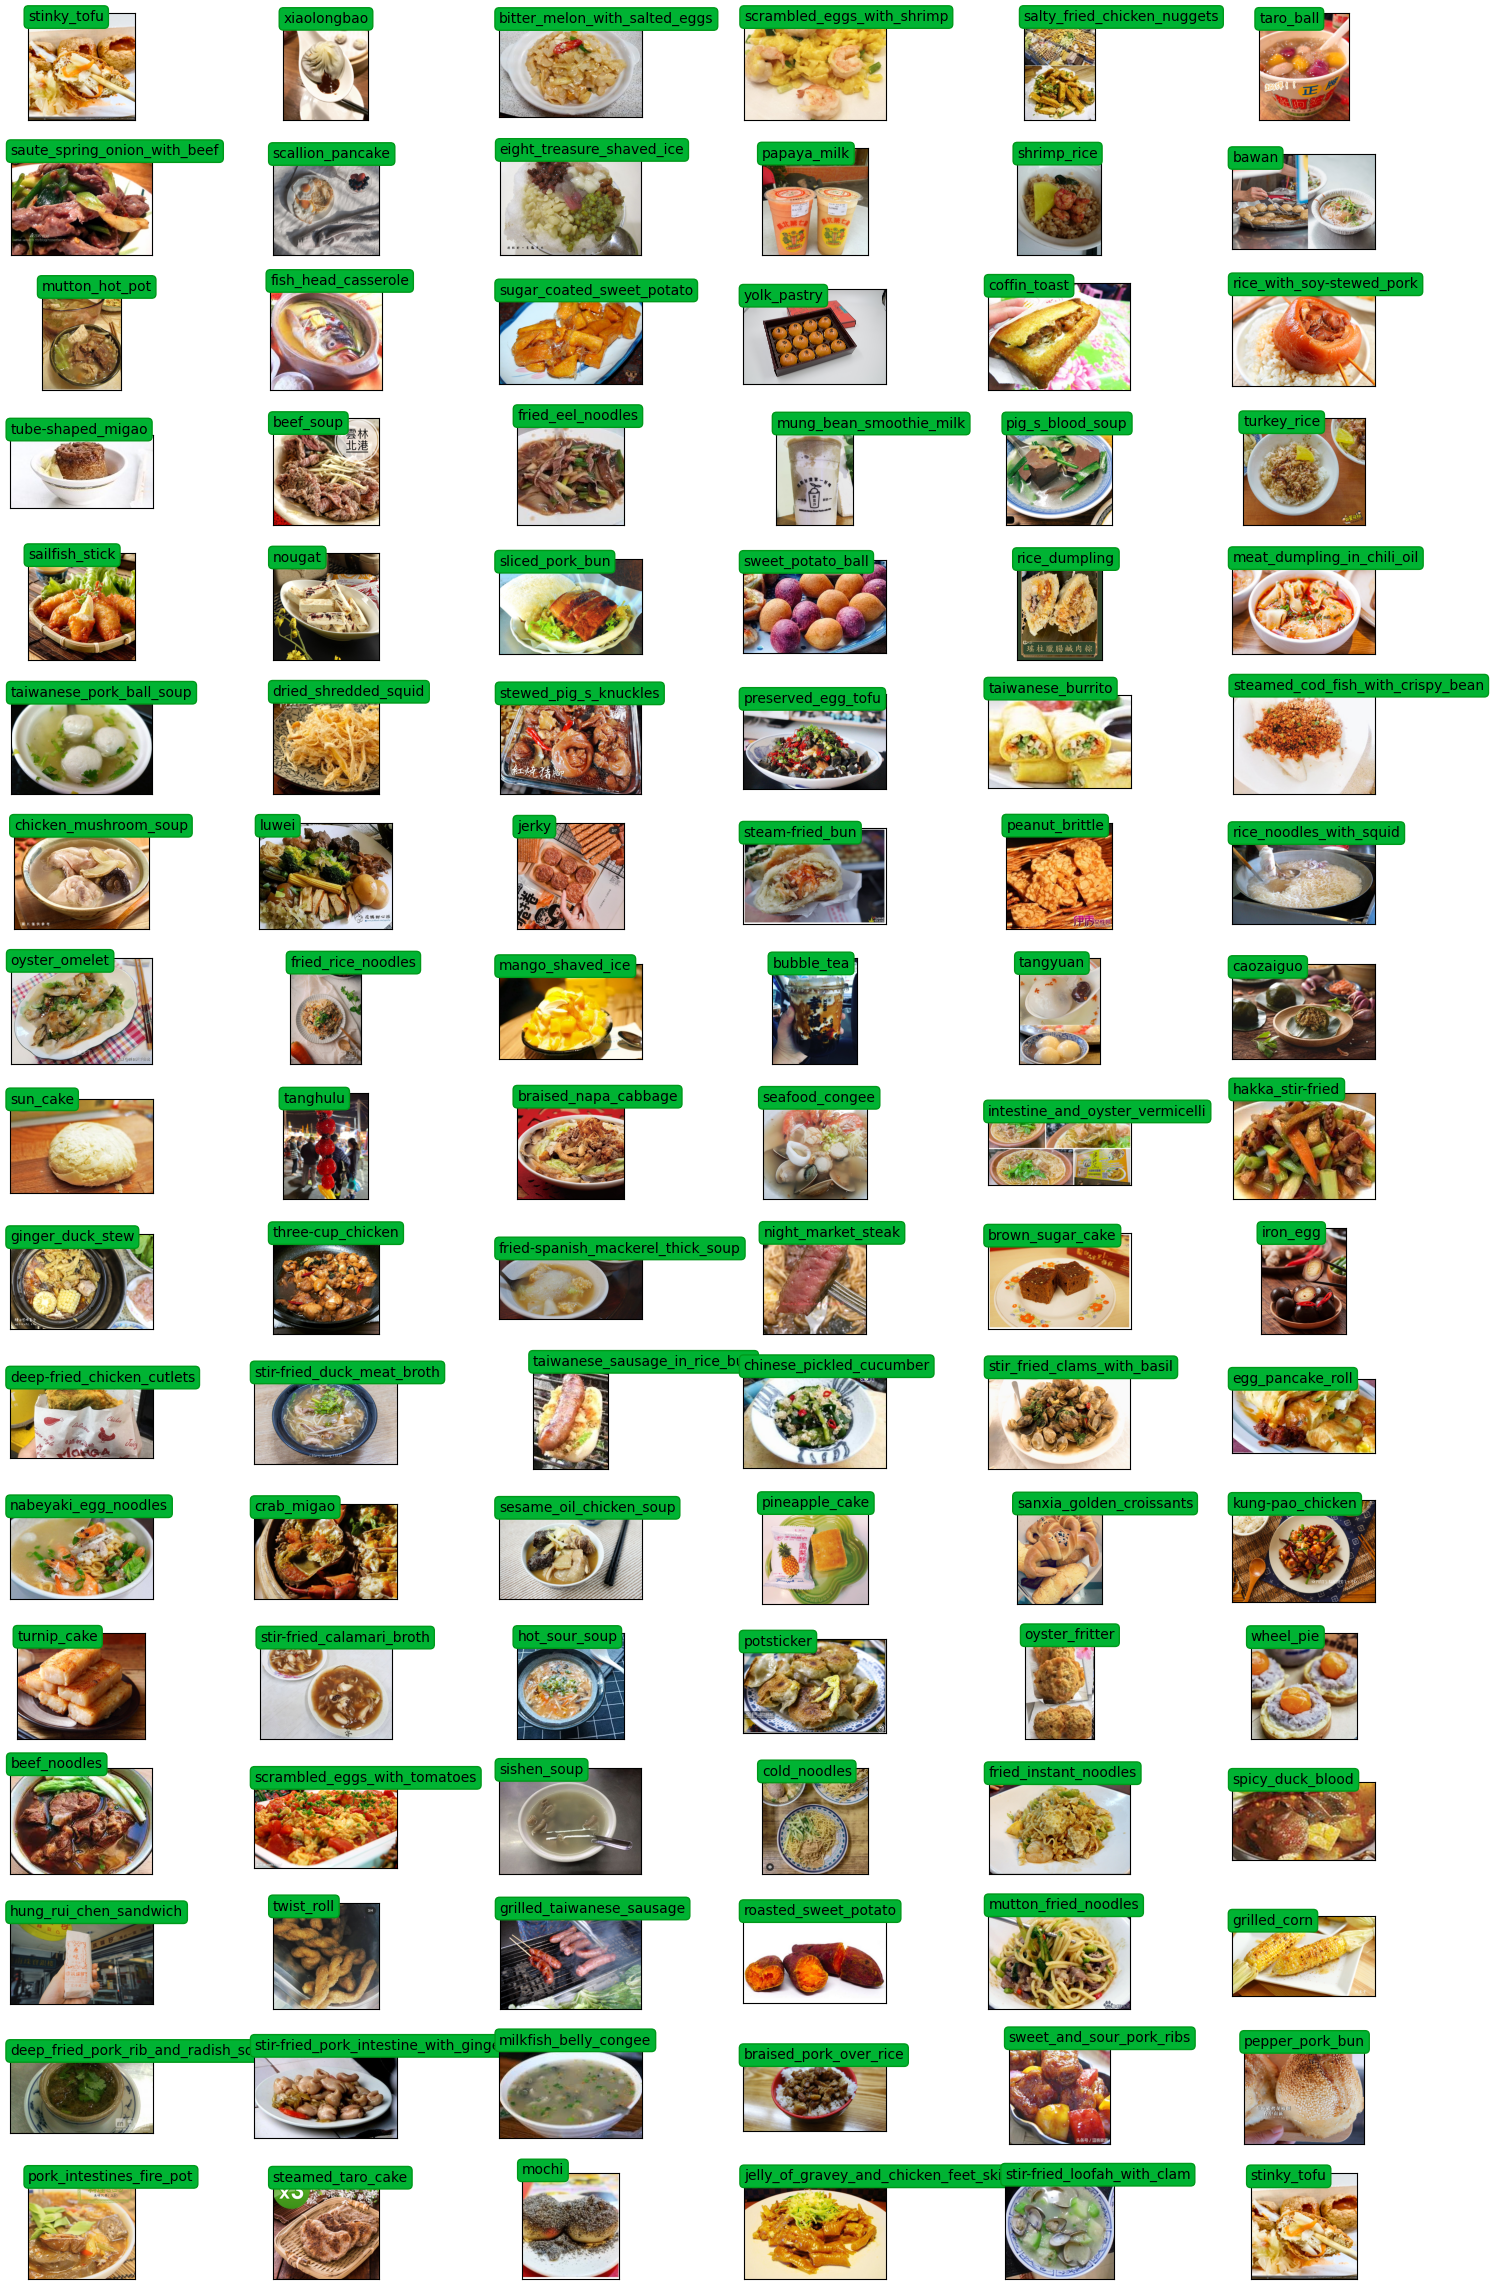

In [3]:
%matplotlib inline
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
food_dirs = os.listdir(train_dir)
for i in range(rows):
    for j in range(cols):
        food_dir = food_dirs[(i*cols + j)%101]
        all_files = os.listdir(os.path.join(train_dir, food_dir))
        img = plt.imread(os.path.join(train_dir, food_dir, all_files[3]))
        ax[i][j].imshow(img)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0, ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=(0, .6, .1), fc=(0, .7, .2)))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(221, 221), 
    color_mode = "rgb",
    batch_size= 32,
    class_mode='categorical',
    shuffle = True)

Found 20372 images belonging to 101 classes.


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(221, 221), 
    color_mode = "rgb",
)

Found 20372 images belonging to 101 classes.


In [7]:
# base_model = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_shape=(221, 221, 3))
# base_model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(221, 221, 3))
# base_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(221, 221, 3))
# base_model = keras.applications.resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(221, 221, 3))
base_model = keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet', input_shape=(221, 221, 3))

17225924/17225924 [==============================] - 0s 0us/step


In [8]:
x = base_model.output
x = Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(.4)(x)

predictions = Dense(101, activation='softmax')(x)

model = Model(base_model.input, predictions)

In [9]:
# model.summary()

In [10]:
model.compile(optimizer='Adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [11]:
history = model.fit_generator(
      train_generator,
      epochs=15
)

/tmp/ipykernel_15/654439912.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
 58/637 [=>............................] - ETA: 10:55 - loss: 10.7754 - accuracy: 0.0221

/usr/local/lib/python3.8/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


210/637 [========>.....................] - ETA: 7:57 - loss: 5.9775 - accuracy: 0.0562

/usr/local/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


637/637 [==============================] - 711s 1s/step - loss: 4.2793 - accuracy: 0.1287
Epoch 2/15
637/637 [==============================] - 667s 1s/step - loss: 2.7043 - accuracy: 0.3020
Epoch 3/15
637/637 [==============================] - 674s 1s/step - loss: 2.2170 - accuracy: 0.4152
Epoch 4/15
637/637 [==============================] - 665s 1s/step - loss: 1.9165 - accuracy: 0.4914
Epoch 5/15
637/637 [==============================] - 668s 1s/step - loss: 1.7209 - accuracy: 0.5424
Epoch 6/15
637/637 [==============================] - 670s 1s/step - loss: 1.5802 - accuracy: 0.5809
Epoch 7/15
637/637 [==============================] - 673s 1s/step - loss: 1.4281 - accuracy: 0.6184
Epoch 8/15
637/637 [==============================] - 669s 1s/step - loss: 1.3449 - accuracy: 0.6371
Epoch 9/15
637/637 [==============================] - 666s 1s/step - loss: 1.2194 - accuracy: 0.6746
Epoch 10/15
637/637 [==============================] - 674s 1s/step - loss: 1.1428 - accuracy: 0.6915


KeyboardInterrupt: 

In [ ]:
# Create {ID, filename} dictionary {'1269': '1269.jpg', '3863': '3863.jpg',.....}
test_dict = {}
for root, dirs, files in os.walk(root_dir + '/test'):
    for filename in files:
        test_id, file_ext = os.path.splitext(filename)
        test_dict[test_id] = filename

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load_img(filename, target_w=150, target_h=150):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (target_w, target_h, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image


In [ ]:
# Read images in order and make predictions
results = []
for i in range(len(test_dict)):
    img = load_img(root_dir + '/test/' + test_dict[str(i)], 221, 221)
    ret = model.predict(img)
    results.append(np.argmax(ret))

In [ ]:
# Print results in CSV format and upload to Kaggle
with open('pred_results.csv', 'w') as f:
    f.write('Id,Category\n')
    for i in range(len(results)):
        f.write(str(i) + ',' + str(results[i]) + '\n')

In [ ]:
# Download your results!
from IPython.display import FileLink
FileLink('pred_results.csv')